## 범주형 데이터 처리 
- 범주형 데이터는 일반적인 모델링 수학적 연산형 모델링 다수가 존재한다. 이런 경우 범주형 데이터가 사용이 불가능하기때문에 특별하게 처리 
- 더미변수를 생성 
- 더미변수 -> 범주형 데이터들을 각각 컬럼으로 생성 -> 해당 범주에 속하는지를 False(0)과 True(1)표현 

In [1]:
import pandas as pd
from sklearn.datasets import load_wine

In [2]:
wine_load = load_wine()

In [3]:
wine = pd.DataFrame(wine_load['data'], 
                    columns=wine_load['feature_names'])
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
wine['Class'] = wine_load['target']
wine['Class']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Class, Length: 178, dtype: int32

In [5]:
# Class 컬럼의 데이터들을 변경 
wine['Class'] = wine['Class'].map(
    {
        0 : 'class_0', 
        1 : 'class_1', 
        2 : 'class_2'
    }
)
wine['Class'].value_counts()

Class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [6]:
## Class 컬럼의 데이터들을 더미변수로 생성 
## get + dummies -> get_dummies()
wine_dummy = pd.get_dummies(wine, columns=['Class'])

In [7]:
wine_dummy.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class_class_0,Class_class_1,Class_class_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,True,False,False
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,True,False,False
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,True,False,False
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,True,False,False
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,True,False,False


In [8]:
wine_dummy['Class_class_1'].value_counts()

Class_class_1
False    107
True      71
Name: count, dtype: int64

### 데이터의 분할
- 분석 모델을 학습하고 성과를 확인하기 위해 데이터를 train, test 세트로 나누고 독립변수와 종속변수로 분리하는 작업 
- 분석 방법에 따라 train, validation, test 세트로 나누기도 한다. 
- 적절한 비율 
    - Train : Test -> 7 : 3
    - Train : Validation : Test -> 6 : 2 : 2
- sklearn에 내장된 train_test_split() 함수를 이용하여 분할
    - train_test_split(X, Y, test_size = None, random_state = None, shuffle = bool, stratify = None)
        - X : 독립 변수 데이터
        - Y : 종속 변수 데이터
        - test_size : 테스트 데이터의 비율 (0부터 1사이의 값)
        - random_state : 임의의 번호를 지정, 같은 숫자를 이용한다면 같은 값들이 출력 
        - shuffle : True면 추출 전에 데이터들을 섞는다. 
        - stratify : None이 아닌 경우에는 지정된 변수를 기준으로 계층화를 하여 해당 변수의 비율이 유지되도록 추출

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [10]:
iris = pd.DataFrame(
    load_iris()['data'], 
    columns = load_iris()['feature_names']
)
iris['Class'] = load_iris()['target']
iris['Class'] = iris['Class'].map(
    {
        0 : 'Setosa', 
        1 : 'Versicolour', 
        2 : 'Virginaca'
    }
)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [11]:
## 데이터를 분할
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.drop('Class', axis=1), 
    iris['Class'], 
    test_size= 0.3, 
    random_state= 100
)

In [12]:
# train, test 개수를 확인 
print('X_train의 개수 : ', X_train.shape, "X_test의 개수 : ", X_test.shape)
print('Y_train의 개수 : ', Y_train.shape, "Y_test의 개수 : ", Y_test.shape)

X_train의 개수 :  (105, 4) X_test의 개수 :  (45, 4)
Y_train의 개수 :  (105,) Y_test의 개수 :  (45,)


In [13]:
iris['Class'].value_counts()

Class
Setosa         50
Versicolour    50
Virginaca      50
Name: count, dtype: int64

In [14]:
Y_train.value_counts()

Class
Versicolour    39
Setosa         34
Virginaca      32
Name: count, dtype: int64

In [15]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    iris.drop('Class', axis=1), 
    iris['Class'], 
    test_size= 0.3, 
    random_state=100, 
    stratify= iris['Class']
)

In [16]:
Y_train2.value_counts()

Class
Versicolour    35
Setosa         35
Virginaca      35
Name: count, dtype: int64

### 데이터 스케일링
- 알고리즘 분석의 대부분은 컬럼 간의 데이터 범위가 크게 차이 나는 경우 만족스러운 결과 X
- 값의 범위가 작은 컬럼에 비해서 값의 범위가 큰 컬럼이 타겟 변수를 예측하는데 큰 영향
- 스케일링 작업은 모든 칼럼 값의 범위를 같게 만들어주는 작업
- 데이터 스케일링 순서
    - 데이터 스케일링의 주의할 점은 train 데이터와 test 데이터를 같은 scaler 객체로 스케일링
    
    1. scaler 선택, 로드
    2. scaler 객체 생성(Class 생성)
    3. train 데이터의 분포 저장
    4. train 데이터 스케일링
    4. test 데이터 스케일링
    5. 원래의 서캐일로 변환

#### Standard Scaler
- 표준화 방식으로 기본 스케일링 방식으로 칼럼들을 평균이 0, 분산이 1인 정규분포로 스케일링
- 최소값과 최대값의 크기를 제한하지 않아 이상치에 굉장히 민감 -> 이상치에 대한 확인 및 정제 후 사용
- 회귀분석보다는 분류분석에서 유용

In [17]:
from sklearn.preprocessing import StandardScaler

StdScaler = StandardScaler()

In [18]:
StdScaler.fit(X_train2)

StandardScaler()

In [19]:
# train data scale
X_train_sc = StdScaler.transform(X_train2)

In [20]:
X_test_sc = StdScaler.transform(X_test2)

In [21]:
print(round(X_train_sc.min(),2))
print(round(X_train_sc.max(),2))
print(round(X_train_sc.mean(),2))
print(round(X_train_sc.std(),2))

-2.14
2.75
-0.0
1.0


In [22]:
print(round(X_test_sc.min(),2))
print(round(X_test_sc.max(),2))
print(round(X_test_sc.mean(),2))
print(round(X_test_sc.std(),2))

-2.63
3.23
-0.08
1.03


## Min-Max Scaler
- 정규화 방식으로 컬럼들을 0과 1 사이의 값으로 스케일링하는 방식
- 최소값 : 0, 최댓값 : 1

In [24]:
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

In [25]:
MmScaler.fit(X_train2)

MinMaxScaler()

In [30]:
X_train_sc2=MmScaler.transform(X_train2)

In [29]:
X_test_sc2 = MmScaler.transform(X_test2)

In [33]:
print(round(X_train_sc2.min()),2)
print(round(X_train_sc2.max()),2)
print(round(X_train_sc2.mean()),2)
print(round(X_train_sc2.std()),2)

0 2
1 2
0 2
0 2


In [34]:
print(round(X_test_sc2.min()),2)
print(round(X_test_sc2.max()),2)
print(round(X_test_sc2.mean()),2)
print(round(X_test_sc2.std()),2)

0 2
1 2
0 2
0 2


## Max Abs Scaler
- 최대 절대값과 0을 기준으로 1과 0이 되도록 모든 값이 -1에서 1까지로 표현
- 스케일링 데이터들이 양수라면  Min-Max와 동일
- 이상치에 대해 굉당히 민감함 이상치 확인 정제
- 분류보다는 회귀에 유용

In [38]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

MaScaler.fit(X_train2)

X_train_sc3 = MaScaler.transform(X_train2)
X_test_sc3 = MaScaler.transform(X_test2)

In [44]:
print(round(X_train_sc3.min(),2))
print(round(X_train_sc3.max(),2))
print(round(X_train_sc3.mean(),2))
print(round(X_train_sc3.std(),2))

0.04
1.0
0.63
0.24


In [45]:
print(round(X_test_sc3.min(),2))
print(round(X_test_sc3.max(),2))
print(round(X_test_sc3.mean(),2))
print(round(X_test_sc3.std(),2))

0.08
1.05
0.61
0.24


In [41]:
from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

RuScaler.fit(X_train2)

X_train_sc4 = RuScaler.transform(X_train2)
X_test_sc4 = RuScaler.transform(X_test2)

In [42]:
print(round(X_train_sc4.min(),2))
print(round(X_train_sc4.max(),2))
print(round(X_train_sc4.mean(),2))
print(round(X_train_sc4.std(),2))

-1.33
2.0
-0.03
0.6


In [43]:
print(round(X_test_sc4.min(),2))
print(round(X_test_sc4.max(),2))
print(round(X_test_sc4.mean(),2))
print(round(X_test_sc4.std(),2))

-1.67
2.33
-0.08
0.62


In [47]:
## 원본 데이터로 변경
pd.DataFrame(X_train_sc4).head()

,0,1,2,3
0,0.230769,-0.333333,-0.111111,-0.066667
1,-0.230769,-0.666667,0.000000,-0.133333
2,-0.615385,1.000000,-0.833333,-0.800000
3,-0.538462,0.833333,-0.833333,-0.733333
4,-0.076923,1.333333,-0.750000,-0.733333


In [48]:
X_origin = RuScaler.inverse_transform(X_train_sc4)

In [49]:
pd.DataFrame(X_origin).head()

,0,1,2,3
0,6.1,2.8,4.0,1.3
1,5.5,2.6,4.4,1.2
2,5.0,3.6,1.4,0.2
3,5.1,3.5,1.4,0.3
4,5.7,3.8,1.7,0.3


#### 데이터 불균형 문제 처리
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확하게 분류하는 것이 중요
- 일반적으로 이상 데이터가 target 값이 되는 경우가 많음
- 데이터가 불균형할 때는 분류의 성능과 target 데이터를 정확히 분류해내는 목표가 일치하지 않게 되는 현상 발생(성능 감소)
- 분석 결과, 머신 러생 등 모델링에서 문제 발생
- 소수의 데이터인 target의 중요도를 낮게 판단함으로 궁극적으로 분석 가능한 모델이 생성되지 않는다.
- 소수의 비정상 데이터를 늘리는 오버샘플링, 상대적으로 많은 데이터에서 일부만 사용하는 언더샘플링이 존재

    - 언더샘플링
        - 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터 셋이 가진 라벨의 수 수준으로 감소시키는방법
        - 데이터의 불균형 문제를 해결 가능하지만, 데이터 수가 줄어듦으로 학습에 대한 성능 감소 가능

In [50]:
!pip install imbalanced_learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ------ --------------------------------- 41.0/257.7 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 5.3 MB/s eta 0:00:00


In [51]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [53]:
## 분포가 불균형한 데이터 생성( 95:1 )

x, y = make_classification(n_samples=5000, n_features=5,
                           weights=[0.95])

print(Counter(y))

Counter({0: 4739, 1: 261})


- 랜덤언더샘플링은 다수를 차지하는 라벨에서 무작위로 데이터를 제거하는 방법
- sampling_strategy 매개변수에 값을 majority로 지정하면 다수의 라벨 데이터를 샘플링해서 소수의 라벨 데이터의 수와 같게 만든다.
- 0과 1 사이의 값으로 지정하면 소수 라벨의 데이터 수와 다수 라벨의 데이터 수가 해당하는 비율에 맞게 조정

In [54]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x,y)

print(Counter(y_under))

Counter({0: 261, 1: 261})


In [57]:
undersample2 = RandomUnderSampler(sampling_strategy=0.5)
x_under2, y_under2 = undersample2.fit_resample(x,y)

print(Counter(y_under2))

Counter({0: 522, 1: 261})


### 오버샘플링
- 소수의 라벨을 지닌 데이터셋을 다수 라벨ㅇ르 지닌 데이터셋의 수 만큼 증식시켜서 학습에 사용하기 위한 충분한 양과 데이터를 확보하는 방법
- 데이터의 손실이 없기 때문에 일반적으로 언더 샘플링보다는 성능에 유리

#### 랜덤 오버샘플링
- 소수의 라벨을 지닌 데이터셋을 단순 복제하여 다수의 라벨과 비율을 맞추는 방법
- 데이터를 단순하게 복제하기 때문에 분포는 변하지 않지만 그 수가 증가함으로 같은 비율로 가중치 가능성 존재
- 오버피팅의 위험성이 다분하지만 불균형 문제를 처리하지 않는 것 보다는 유효

In [60]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.5)

x_over, y_over = oversample.fit_resample(x,y)

print(Counter(y_over))

Counter({0: 4739, 1: 2369})


In [63]:
oversample2 = RandomOverSampler(sampling_strategy='minority')

x_over2, y_over2 = oversample2.fit_resample(x,y)

print(Counter(y_over2))

Counter({0: 4739, 1: 4739})


#### SMOTE
- 소수 라벨을 지닌 데이터셋의 관측 값에 대한 K 개의 최근접 아웃을 찾고 관측값과 아웃으로 선택된 값 사이에 임의의 데이터 생성

In [65]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority')
x_sm , y_sm =smote_sample.fit_resample(x,y)

print(Counter(y_sm))

Counter({0: 4739, 1: 4739})


In [67]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

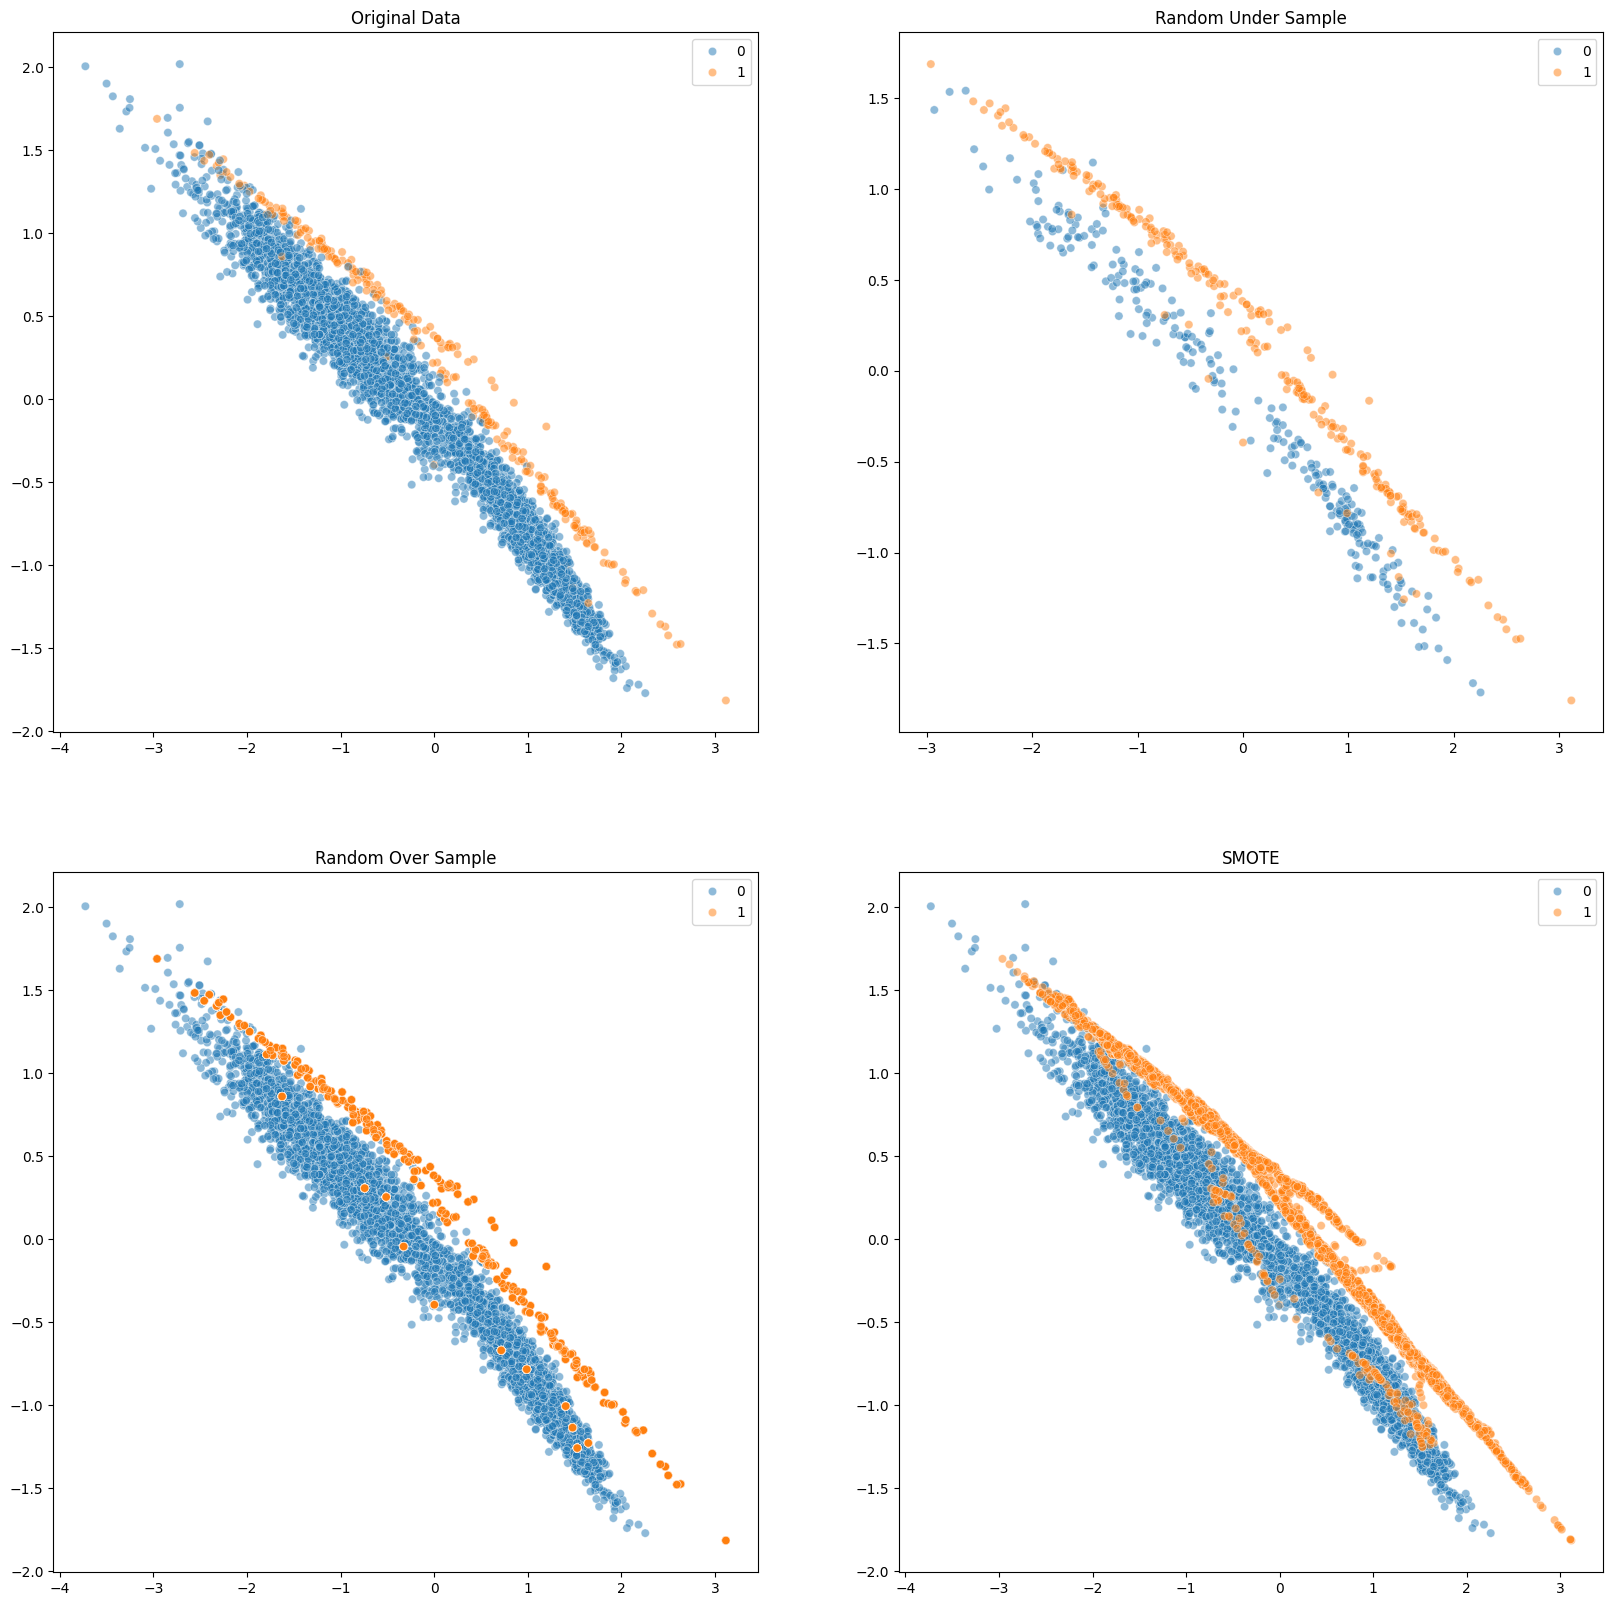

In [71]:
fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(20,20))

sns.scatterplot(x=x[:,1], y=x[:,2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_under[:,1], y=x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_over2[:,1], y=x_over2[:,2], hue=y_over2, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_sm[:,1], y=x_sm[:,2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sample')
axes[1][0].set_title('Random Over Sample')
axes[1][1].set_title('SMOTE')

plt.show()